In [432]:
#Manipulação de Dados
import pandas as pd
import numpy as np
from datetime import datetime

#Visualização de Dados
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sb

In [434]:
changelog_file = pd.read_csv("../data/raw/new_changelog_file.csv", sep = ";")
commit_file = pd.read_csv("../data/raw/new_commit_file.csv", sep = ";")
comment_file = pd.read_csv("../data/raw/new_comment_file.csv", sep = ";")
final_list_of_contributors = pd.read_csv("../data/raw/final_list_of_contributors_after.csv", sep = ";")
snapshot_file = pd.read_csv("../data/raw/new_snapshot_file.csv", sep = ";")


In [256]:
db_total = pd.merge(commit_file, snapshot_file, on='Key')

In [257]:
db_total

,Project_x,Manager_x,Category_x,Key,CommitHash,IsMergeCommit,Author,AuthorDate,Committer,CommitterDate,CommitMessageTopWords,FileName,FilePath,ChangeType,IsSrcFile,IsTestFile,AddLines,DelLines,NoMethods,LoC,CyC,NoTokens,Project_y,Owner,Manager_y,Category_y,Priority,Status,Reporter,Assignee,Components,SummaryTopWords,DescriptionTopWords,CommentsTopWords,CreationDate,ResolutionDate,AffectsVersions,FixVersions,NoComments,FirstCommentDate,LastCommentDate,NoWatchers,NoAttachments,FirstAttachmentDate,LastAttachmentDate,NoAttachedPatches,FirstAttachedPatchDate,LastAttachedPatchDate,InwardIssueLinks,OutwardIssueLinks,HasMergeCommit,CommitsMessagesTopWords,NoCommits,NoAuthors,NoCommitters,AuthorsFirstCommitDate,AuthorsLastCommitDate,CommittersFirstCommitDate,CommittersLastCommitDate,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines
0,BUILDR,Apache Buildr Committee,build-management,BUILDR-261,5ab8ada06fa5e4ddbae7ea48cb24e40cc4330cd3,0,Alex Boisvert,2009-02-22 17:13:38,Alex Boisvert,2009-02-22 17:13:38,run:1 dependencies:1 git:1 id:1 https:1 apache...,tests.rb,lib/buildr/scala/tests.rb,MODIFY,1,1,2,1,13,136.0,29.0,704.0,BUILDR,ASF,Apache Buildr Committee,build-management,Major,Closed,boisvert,NaN,Test frameworks,run:1 dependencies:1,java:37 net:6 run:5 specs:4 dependencies:4 lau...,fixed:1 trunk:1 commit:1 run:1 dependencies:1 ...,2009-02-22 17:13:18,2009-02-22 17:14:29,1.3.3,1.3.4,1,2009-02-22 17:14:29.096,2009-02-22 17:14:29.096,0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,0,run:1 dependencies:1 git:1 id:1 https:1 apache...,1,1,1,2009-02-22 17:13:38+00:00,2009-02-22 17:13:38+00:00,2009-02-22 17:13:38+00:00,2009-02-22 17:13:38+00:00,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
1,BUILDR,Apache Buildr Committee,build-management,BUILDR-263,3f13febcc63fd72d531e1c3f20804917e652a112,0,Assaf Arkin,2009-03-06 01:38:03,Assaf Arkin,2009-03-06 01:38:03,fixed:1 package:1 war:1 merge:1 working:1 corr...,CHANGELOG,CHANGELOG,MODIFY,0,0,1,0,0,897.0,0.0,7312.0,BUILDR,ASF,Apache Buildr Committee,build-management,Major,Closed,boisvert,NaN,NaN,package:1 war:1 merge:1 working:1 correctly:1 ...,war:7 web:7 contain:6 package:4 end:4 exclude:...,fix:1 resolve:1,2009-03-05 21:51:42,2009-03-06 02:11:32,1.3.3,1.3.4,1,2009-03-06 02:11:32.943,2009-03-06 02:11:32.943,0,1,2009-03-05 21:52:14.194,2009-03-05 21:52:14.194,0,NaN,NaN,NaN,NaN,0,fixed:1 package:1 war:1 merge:1 working:1 corr...,1,1,1,2009-03-06 01:38:03+00:00,2009-03-06 01:38:03+00:00,2009-03-06 01:38:03+00:00,2009-03-06 01:38:03+00:00,0,0,1,1,0,0,0,4,20,10,0,0,0,0,0
2,BUILDR,Apache Buildr Committee,build-management,BUILDR-263,3f13febcc63fd72d531e1c3f20804917e652a112,0,Assaf Arkin,2009-03-06 01:38:03,Assaf Arkin,2009-03-06 01:38:03,fixed:1 package:1 war:1 merge:1 working:1 corr...,filter.rb,lib/buildr/core/filter.rb,MODIFY,1,0,2,2,23,171.0,47.0,1082.0,BUILDR,ASF,Apache Buildr Committee,build-management,Major,Closed,boisvert,NaN,NaN,package:1 war:1 merge:1 working:1 correctly:1 ...,war:7 web:7 contain:6 package:4 end:4 exclude:...,fix:1 resolve:1,2009-03-05 21:51:42,2009-03-06 02:11:32,1.3.3,1.3.4,1,2009-03-06 02:11:32.943,2009-03-06 02:11:32.943,0,1,2009-03-05 21:52:14.194,2009-03-05 21:52:14.194,0,NaN,NaN,NaN,NaN,0,fixed:1 package:1 war:1 merge:1 working:1 corr...,1,1,1,2009-03-06 01:38:03+00:00,2009-03-06 01:38:03+00:00,2009-03-06 01:38:03+00:00,2009-03-06 01:38:03+00:00,0,0,1,1,0,0,0,4,20,10,0,0,0,0,0
3,BUILDR,Apache Buildr Committee,build-management,BUILDR-263,3f13febcc63fd72d531e1c3f20804917e652a112,0,Assaf Arkin,2009-03-06 01:38:03,Assaf Arkin,2009-03-06 01:38:03,fixed:1 package:1 war:1 merge:1 working:1 corr...,archive.rb,lib/buildr/packaging/archive.rb,MODIFY,1,0,5,5,37,274.0,69.0,1641.0,BUILDR,ASF,Apache Buildr Committee,build-management,Major,Closed,boisvert,NaN,NaN,package:1 war:1 merge:1 working:1 correctly:1 ...,war:7 web:7 contain:6 package:4 end:4 exclude:...,fix:1 resolve:1

In [258]:
db_total.drop(columns=['Manager_x', 'Category_x', 'Project_y', 'Owner', 'Manager_y', 'Category_y', 'HasMergeCommit', "IsMergeCommit", "AffectsVersions", "FixVersions", "NoWatchers", "InwardIssueLinks", "OutwardIssueLinks"], inplace = True)

In [259]:
db_total["ResolutionDate"] = pd.to_datetime(db_total["ResolutionDate"], utc=True)
db_total["CreationDate"] = pd.to_datetime(db_total["CreationDate"], utc=True)
db_total["CommittersLastCommitDate"] = pd.to_datetime(db_total["CommittersLastCommitDate"], utc=True)
db_total["CommittersFirstCommitDate"] = pd.to_datetime(db_total["CommittersFirstCommitDate"], utc=True)
db_total["CommitterDate"] = pd.to_datetime(db_total["CommitterDate"], utc=True)

In [260]:
db_total = db_total.rename(columns={"Project_x": "Project"})

In [261]:
db_total["TimeFixBug"] = ((db_total["ResolutionDate"] - db_total["CreationDate"]).dt.days)

In [262]:
committers_info = db_total.groupby("Committer").count().reset_index()[["Committer", "Project"]]
committers_info = committers_info.rename(columns={"Project": "NumberCommits"})

In [263]:
grouped = db_total.groupby(['Committer', pd.Grouper(key='CommitterDate', freq='M')])['Project'].count().reset_index().sort_values('CommitterDate')

grouped = grouped.rename(columns = {'Project': "FreqCommitPerM"})

frequency_commit = grouped.groupby(by=["Committer"]).median()['FreqCommitPerM'].values
ids_grouped = grouped.groupby(by=["Committer"]).median()['FreqCommitPerM'].index

zip_iterator = zip(ids_grouped, frequency_commit)
a_dictionary = dict(zip_iterator)
committers_info['Median_FreqCommitPerM'] = committers_info['Committer'].map(a_dictionary)
db_total['Median_FreqCommitPerM'] = db_total['Committer'].map(a_dictionary)

In [264]:
grouped = comment_file.groupby("Author").count().reset_index()[["Author", "Project"]]
grouped = grouped.rename(columns = {'Project': "Number_Comments"})

frequency_comment = grouped['Number_Comments'].values
ids_grouped = grouped['Author'].values

zip_iterator = zip(ids_grouped, frequency_comment)
a_dictionary = dict(zip_iterator)
committers_info['Number_Comments'] = committers_info['Committer'].map(a_dictionary)
db_total['Number_Comments'] = db_total['Committer'].map(a_dictionary)

In [265]:
comment_file["CreationDate"] = pd.to_datetime(comment_file["CreationDate"], utc=True, format='mixed')

In [266]:
committers_info["Metric_Commits"] = committers_info["NumberCommits"] / committers_info["Median_FreqCommitPerM"]
committers_info = committers_info.fillna(0)


In [267]:
committers_info["metric_engajament"] = (committers_info["Metric_Commits"]/np.quantile(committers_info["Metric_Commits"].values, 0.9)) + (committers_info["Number_Comments"] / np.quantile(committers_info["Number_Comments"].values, 0.95))

In [268]:
committers_info["metric_engajament"].describe()

count    1517.000000
mean        1.050804
std         7.121976
min         0.016088
25%         0.032176
50%         0.151685
75%         0.577106
max       231.731117
Name: metric_engajament, dtype: float64

In [281]:
categoria_engajamento_dev = []

committers = committers_info["Committer"].values
metric_engajament = committers_info["metric_engajament"].values

for i in range(0, len(committers)):
  if metric_engajament[i] <= 0.15:
    categoria_engajamento_dev.append("Pouco Engajado")
  elif (metric_engajament[i] > 0.15) and (metric_engajament[i] < 0.58):
    categoria_engajamento_dev.append("Engajado")
  else:
    categoria_engajamento_dev.append("Muito Engajado")

zip_iterator = zip(committers, categoria_engajamento_dev)
a_dictionary = dict(zip_iterator)
db_total['Engagement'] = db_total['Committer'].map(a_dictionary)

In [282]:
timefixbug_mean = db_total[['Committer', 'TimeFixBug']].groupby(by=["Committer"]).median().values
timefixbug_mean = timefixbug_mean.reshape((1517,))
zip_iterator = zip(ids_grouped, timefixbug_mean)
a_dictionary = dict(zip_iterator)
db_total['TimeFixBugMean'] = db_total['Committer'].map(a_dictionary)

In [283]:
data_1 = pd.DataFrame.from_dict(a_dictionary, orient='index', columns=["TimeFixBugMean"])
data_1['Commiter'] = committers
data_1['Engagement'] = categoria_engajamento_dev

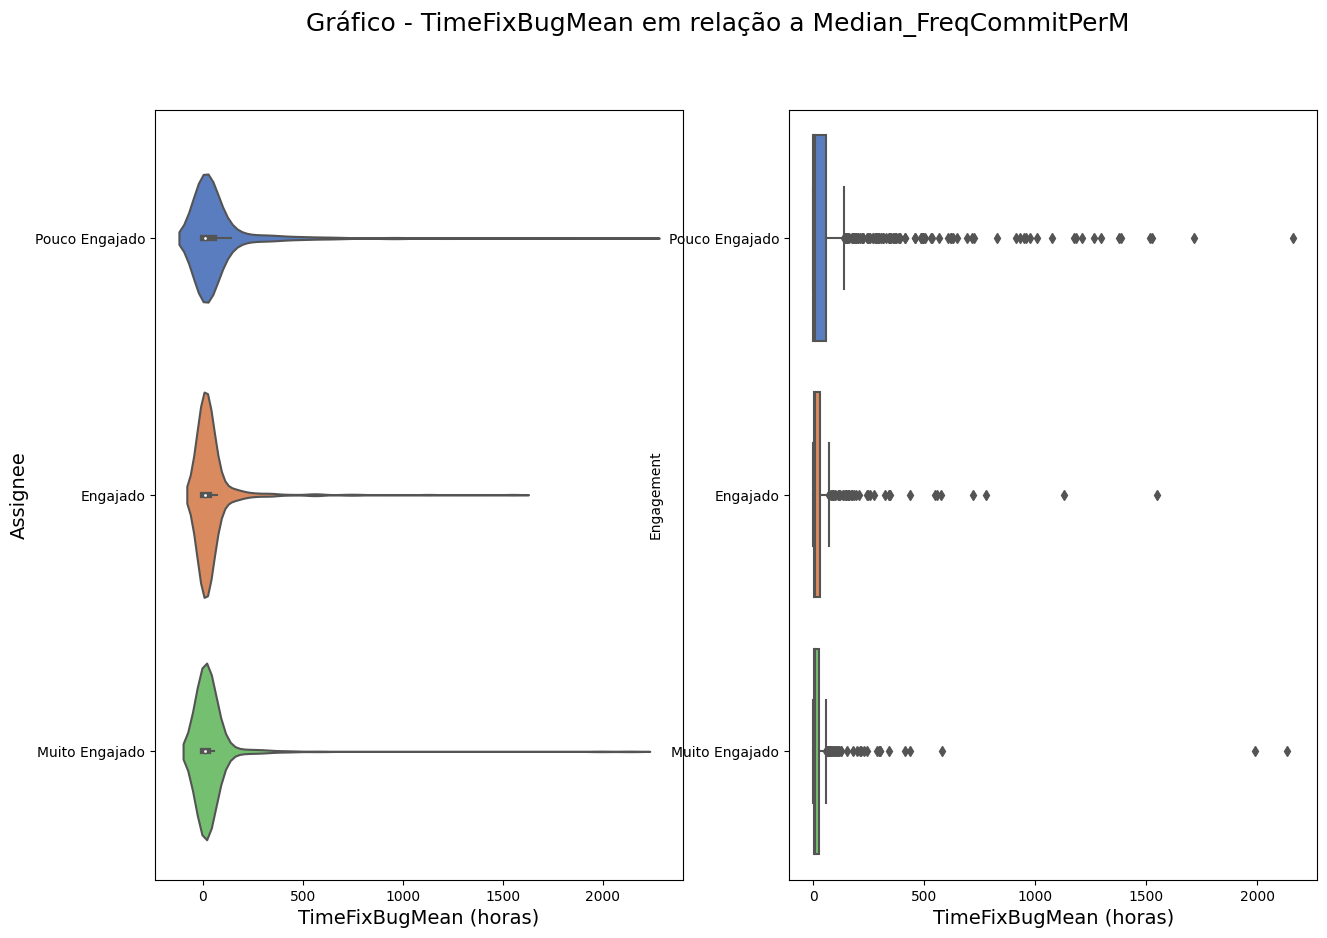

In [284]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))

sb.violinplot(x = 'TimeFixBugMean', y = 'Engagement',
                data = data_1, 
                palette = "muted", 
                ax = axes[0])
axes[0].set_xlabel('TimeFixBugMean (horas)', fontsize = 14)
axes[0].set_ylabel('Assignee', fontsize = 14) 

sb.boxplot(x = 'TimeFixBugMean', y = 'Engagement',
                data = data_1, 
                palette = "muted",
                ax = axes[1])
axes[1].set_xlabel('TimeFixBugMean (horas)', fontsize = 14)

fig.suptitle('Gráfico - TimeFixBugMean em relação a Median_FreqCommitPerM', fontsize = 18)
plt.show()

In [285]:
data_1['Engagement'].value_counts()

Engagement
Pouco Engajado    755
Engajado          385
Muito Engajado    377
Name: count, dtype: int64

In [286]:
db_total[db_total['Engagement'] == 'Muito Engajado']['Priority'].value_counts()

Priority
Major       204579
Minor        38627
Critical     33745
Blocker      25131
Trivial      12465
Normal        9718
Low           5682
Urgent        1194
Name: count, dtype: int64

In [287]:
db_total[db_total['Engagement'] == 'Engajado']['Priority'].value_counts()

Priority
Major       40531
Minor        6697
Blocker      5769
Critical     5553
Normal       1842
Trivial      1185
Low          1010
Urgent        301
Name: count, dtype: int64

In [288]:
db_total[db_total['Engagement'] == 'Pouco Engajado']['Priority'].value_counts()

Priority
Major       7526
Minor       2106
Blocker     1144
Critical     757
Trivial      259
Normal       210
Low          155
Urgent        56
Name: count, dtype: int64

# Engajamento

In [449]:
# Quantidade de Commits
quant_commits_commiter_values = commit_file.groupby(by=["Committer"])["Project"].count().values
quant_commits_commiter_index = commit_file.groupby(by=["Committer"])["Project"].count().index
zip_iterator = zip(quant_commits_commiter_index, quant_commits_commiter_values)
a_dictionary_commits = dict(zip_iterator)

In [450]:
# Quantidade de vezes que foi assignee
quant_assignee_commiter_values = snapshot_file.groupby(by=["Assignee"])["Priority"].count().values
quant_assignee_commiter_index = snapshot_file.groupby(by=["Assignee"])["Priority"].count().index
zip_iterator = zip(quant_assignee_commiter_index, quant_assignee_commiter_values)
a_dictionary_assignee = dict(zip_iterator)

In [451]:
# Quantidade de vezes que foi reporter
quant_reporter_commiter_values = snapshot_file.groupby(by=["Reporter"])["Priority"].count().values
quant_reporter_commiter_index = snapshot_file.groupby(by=["Reporter"])["Priority"].count().index
zip_iterator = zip(quant_reporter_commiter_index, quant_reporter_commiter_values)
a_dictionary_reporter = dict(zip_iterator)

In [452]:
# Quantidade de vezes que comentou
quant_comment_commiter_values = comment_file.groupby(by=["Author"])["Content"].count().values
quant_comment_commiter_index = comment_file.groupby(by=["Author"])["Content"].count().index
zip_iterator = zip(quant_comment_commiter_index, quant_comment_commiter_values)
a_dictionary_comment = dict(zip_iterator)

In [453]:
# Mediana da Frequência Média de Commits por Mês
commit_file["CommitterDate"] = pd.to_datetime(commit_file["CommitterDate"], utc=True, format='mixed')
grouped = commit_file.groupby(['Committer', pd.Grouper(key='CommitterDate', freq='M')])['Project'].count().reset_index().sort_values('CommitterDate')

grouped = grouped.rename(columns = {'Project': "FreqCommitPerM"})

frequency_commit = grouped.groupby(by=["Committer"]).median()['FreqCommitPerM'].values
ids_grouped = grouped.groupby(by=["Committer"]).median()['FreqCommitPerM'].index

zip_iterator = zip(ids_grouped, frequency_commit)
a_dictionary_median_freq_comment = dict(zip_iterator)

In [454]:
timefixbug_mean = db_total[['Committer', 'TimeFixBug']].groupby(by=["Committer"]).median().values
timefixbug_mean = timefixbug_mean.reshape((1517 ,))
zip_iterator = zip(ids_grouped, timefixbug_mean)
a_dictionary_commiters = dict(zip_iterator)

In [455]:
data_items = a_dictionary_commiters.items()
data_list = list(data_items)

df = pd.DataFrame(data_list, columns=['Committer', 'TimeFixBugMean'])

In [456]:
df

,Committer,TimeFixBugMean
0,-1,35.0
1,id1014,1.0
2,id1031,104.0
3,id1033,718.0
4,id1049,0.0
...,...,...
134,id971,6.0
135,id980,0.0
136,id982,0.0
137,id986,22.0


In [457]:
df['NoCommits'] = df['Committer'].map(a_dictionary_commits)
df['NoAssignee'] = df['Committer'].map(a_dictionary_assignee)
df['NoAuthorComment'] = df['Committer'].map(a_dictionary_comment)
df['NoReporter'] = df['Committer'].map(a_dictionary_reporter)
df['MedianFreqCommitsPerMonth'] = df['Committer'].map(a_dictionary_median_freq_comment)


In [458]:
df = df.fillna(0)

In [459]:
df

,Committer,TimeFixBugMean,NoCommits,NoAssignee,NoAuthorComment,NoReporter,MedianFreqCommitsPerMonth
0,-1,35.0,23,296.0,0.0,0.0,4.5
1,id1014,1.0,18,12.0,119.0,7.0,2.5
2,id1031,104.0,8,7.0,86.0,4.0,4.0
3,id1033,718.0,10,14.0,325.0,19.0,2.0
4,id1049,0.0,10,3.0,128.0,6.0,5.0
...,...,...,...,...,...,...,...
134,id971,6.0,864,53.0,729.0,46.0,45.0
135,id980,0.0,12,85.0,765.0,93.0,4.0
136,id982,0.0,5,29.0,194.0,23.0,5.0
137,id986,22.0,2,0.0,10.0,0.0,1.0


In [460]:
df["DirectContribution"] = df["NoCommits"] / df["MedianFreqCommitsPerMonth"]

In [461]:
df["DirectContribution"].describe()

count    139.000000
mean      27.142058
std       27.825777
min        1.000000
25%        5.155556
50%       19.200000
75%       43.117647
max      130.888889
Name: DirectContribution, dtype: float64

In [462]:
df["IndirectContribution"] = df["NoReporter"] + df["NoAssignee"] + df["NoAuthorComment"]


In [463]:
df["IndirectContribution"].describe()

count     139.000000
mean      636.719424
std       674.437211
min         0.000000
25%       148.500000
50%       482.000000
75%       829.500000
max      3417.000000
Name: IndirectContribution, dtype: float64

In [464]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[["DirectContribution", "IndirectContribution"]] = pd.DataFrame(min_max_scaler.fit_transform(df[["DirectContribution", "IndirectContribution"]]))

In [470]:
df["Contribution"] = df["DirectContribution"] + df["IndirectContribution"]

In [474]:
np.quantile(df["Contribution"].values, 0.25)

0.5583404154404634

In [431]:
snapshot_file.AuthorsLastCommitDate

0        2009-03-12 23:35:27+00:00
1                              NaT
2        2009-03-12 23:42:37+00:00
3        2009-03-13 02:50:15+00:00
4                              NaT
                   ...            
73288    2018-11-29 09:34:14+08:00
73289    2018-12-05 17:00:56-05:00
73290    2018-12-18 18:02:03-05:00
73291    2018-12-12 14:07:49+05:18
73292    2018-12-22 13:25:31+09:00
Name: AuthorsLastCommitDate, Length: 73293, dtype: object

In [420]:
categoria_engajamento_dev = []

committers = df["Committer"].values
metric_engajament = df["Contribution"].values
contribution_90 = np.quantile(df["Contribution"].values, 0.9)

for i in range(0, len(committers)):
    if metric_engajament[i] <= 0.044:
        categoria_engajamento_dev.append("Pouco Engajado")
    elif (metric_engajament[i] > 0.044) and (metric_engajament[i] < 1.4):
        categoria_engajamento_dev.append("Engajado")
    elif (metric_engajament[i] >= 1.4) and (metric_engajament[i] < contribution_90):
        categoria_engajamento_dev.append("Muito Engajado")
    else:
        categoria_engajamento_dev.append("Outlier")

zip_iterator = zip(committers, categoria_engajamento_dev)
a_dictionary = dict(zip_iterator)
df['Engagement'] = df['Committer'].map(a_dictionary)

In [422]:
df['Engagement'].value_counts()

Engagement
Engajado          636
Pouco Engajado    502
Muito Engajado    227
Outlier           152
Name: count, dtype: int64

Text(0, 0.5, 'Engajament')

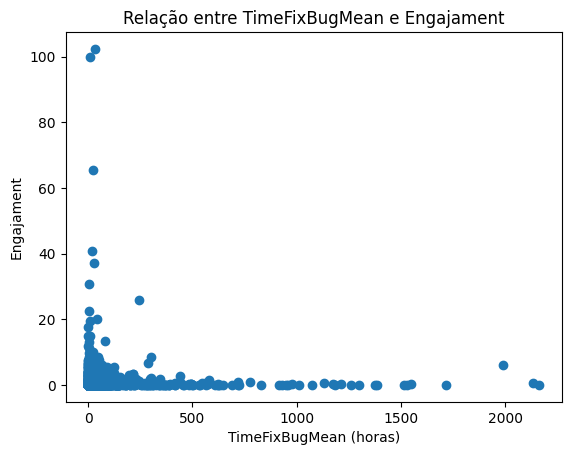

In [421]:
plt.scatter(df.TimeFixBugMean, df.Contribution)
plt.title("Relação entre TimeFixBugMean e Engajament")
plt.xlabel("TimeFixBugMean (horas)")
plt.ylabel("Engajament")